# KNN Regression

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

## Duration

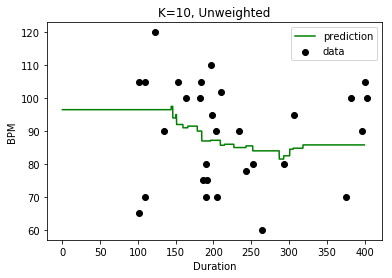

In [17]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 400, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.xlabel('Duration')
plt.ylabel('BPM')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

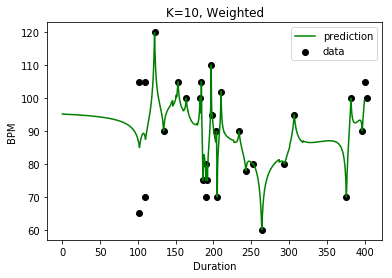

In [16]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 400, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.xlabel('Duration')
plt.ylabel('BPM')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [18]:
#Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.44 (+/- 0.81)
Weighted Accuracy: -0.78 (+/- 0.77)


This KNN Regression, which uses duration instead of loudness, has much higher accuracies than the previous regression model, but they are still terrible in terms of the scale of the errors versus the base terms. It's interesting to not that the weighted accuracy has lower variance than the unweighted accuracy.

## Duration and Loudness

In [21]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


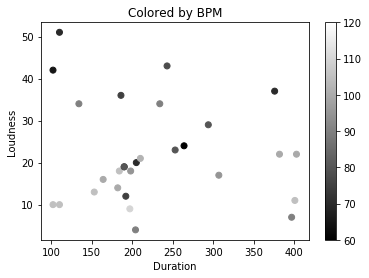

In [24]:
#Visualize using a colormap
import seaborn as sns
plt.scatter(music['duration'], music['loudness'], c=music['bpm'])
plt.gray()
plt.colorbar()
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.title('Colored by BPM')

plt.show()

In [37]:
#Normalize the values between 0 and 1 (min-max scaling)
norm_music = pd.DataFrame()

for cat in ['loudness', 'duration', 'bpm']:
    normed = []
    for i in range(len(music[cat])):
        normed.append((music[cat][i]-music[cat].min())/(music[cat].max()-music[cat].min()))

    norm_music[cat] = normed


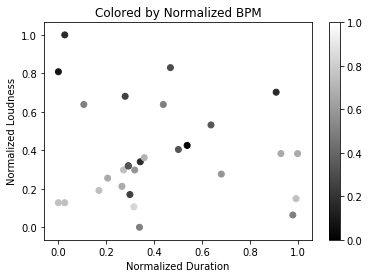

In [39]:
#Re-graph
plt.scatter(norm_music['duration'], norm_music['loudness'], c=norm_music['bpm'])
plt.gray()
plt.colorbar()
plt.xlabel('Normalized Duration')
plt.ylabel('Normalized Loudness')
plt.title('Colored by Normalized BPM')

plt.show()

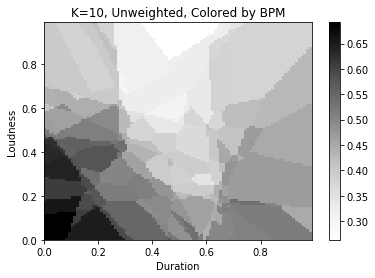

In [109]:
# Build our unweighted model.
knn2 = neighbors.KNeighborsRegressor(n_neighbors=10)
X = norm_music[['duration', 'loudness']]
Y = norm_music['bpm']
knn2.fit(X, Y)

# Set up our prediction matrix.
Tx, Ty = np.meshgrid(np.arange(0,1,0.01), np.arange(0,1,0.01))

Z = knn2.predict(np.c_[Tx.ravel(), Ty.ravel()])

# Put the result into a color plot.
Z = Z.reshape(Tx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap('Greys')
plt.pcolormesh(Tx, Ty, Z)

plt.colorbar()
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.title('K=10, Unweighted, Colored by BPM')
plt.show()

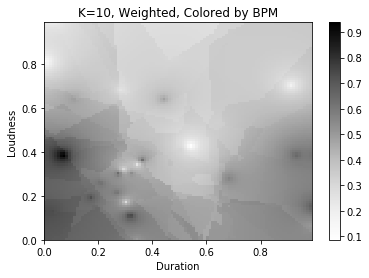

In [110]:
# Build our weighted model.
knn_w2 = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = norm_music[['duration', 'loudness']]
Y = norm_music['bpm']
knn_w2.fit(X, Y)

# Set up our prediction matrix.
Tx, Ty = np.meshgrid(np.arange(0,1,0.01), np.arange(0,1,0.01))

Z = knn_w2.predict(np.c_[Tx.ravel(), Ty.ravel()])

# Put the result into a color plot.
Z = Z.reshape(Tx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap('Greys')
plt.pcolormesh(Tx, Ty, Z)

plt.colorbar()
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.title('K=10, Weighted, Colored by BPM')
plt.show()

In [111]:
#Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn2, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w2, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.19 (+/- 0.62)
Weighted Accuracy: -0.17 (+/- 1.11)


The unweighted accuracy improves, but the weighted accuracy gains quite a bit of variance, so this three-dimensional model is probably not the best choice for KNN. The variance is much larger than the base value for both models.